In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2 as cv
import glob

In [33]:
train_sample_metadata = pd.read_json('Training dataset/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

In [34]:
train_sample_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, aagfhgtpmv.mp4 to eukvucdetx.mp4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     400 non-null    object
 1   split     400 non-null    object
 2   original  323 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [35]:
train_sample_metadata['label'].value_counts()

label
FAKE    323
REAL     77
Name: count, dtype: int64

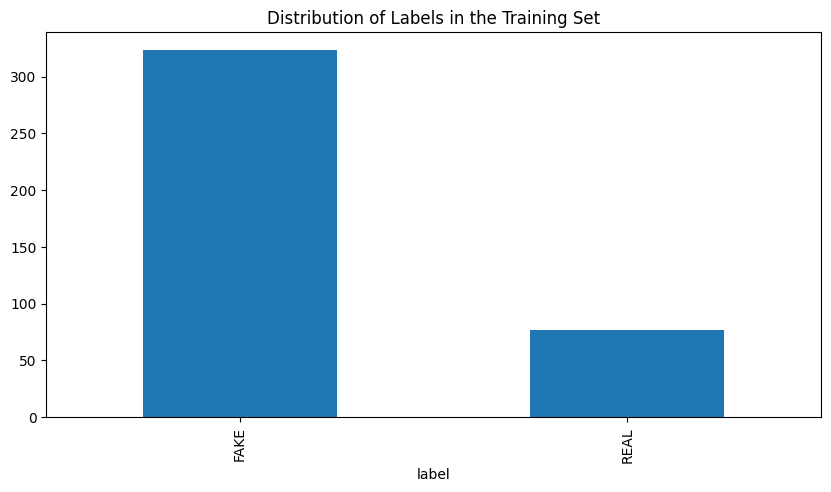

In [36]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(10, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [37]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [38]:
unique_values(train_sample_metadata)

label  split  original
Total      400    400       323
Uniques      2      1       209

In [39]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequency'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [40]:
most_frequent_values(train_sample_metadata)

label  split        original
Total                 400    400             323
Most frequent item   FAKE  train  atvmxvwyns.mp4
Frequency             323    400               6
Percent from total  80.75  100.0           1.858

In [41]:
original_counts = pd.DataFrame(train_sample_metadata['original'].value_counts())
original_counts.head(10)

count
original             
atvmxvwyns.mp4      6
meawmsgiti.mp4      6
qeumxirsme.mp4      5
kgbkktcjxf.mp4      5
fysyrqfguw.mp4      4
gjypopglvi.mp4      4
dzyuwjkjui.mp4      4
gipbyjfxfp.mp4      4
ywvlvpvroj.mp4      4
qtnjyomzwo.mp4      4

In [42]:
fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='FAKE'].sample(10).index)
fake_train_sample_video

['czmqpxrqoh.mp4',
 'eczrseixwq.mp4',
 'dbhrpizyeq.mp4',
 'cksanfsjhc.mp4',
 'czfunozvwp.mp4',
 'cepxysienc.mp4',
 'ddqccgmtka.mp4',
 'blpchvmhxx.mp4',
 'aufmsmnoye.mp4',
 'dakqwktlbi.mp4']

In [43]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label=='REAL'].sample(10).index)    # returning the index value which is video name
real_train_sample_video

['cmbzllswnl.mp4',
 'cpjxareypw.mp4',
 'beyebyhrph.mp4',
 'eggbjzxnmg.mp4',
 'atkdltyyen.mp4',
 'anpuvshzoo.mp4',
 'eudeqjhdfd.mp4',
 'bgvhtpzknn.mp4',
 'atvmxvwyns.mp4',
 'agrmhtjdlk.mp4']

In [44]:
def display_image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   # converting the frame color to RGB
    ax.imshow(frame)

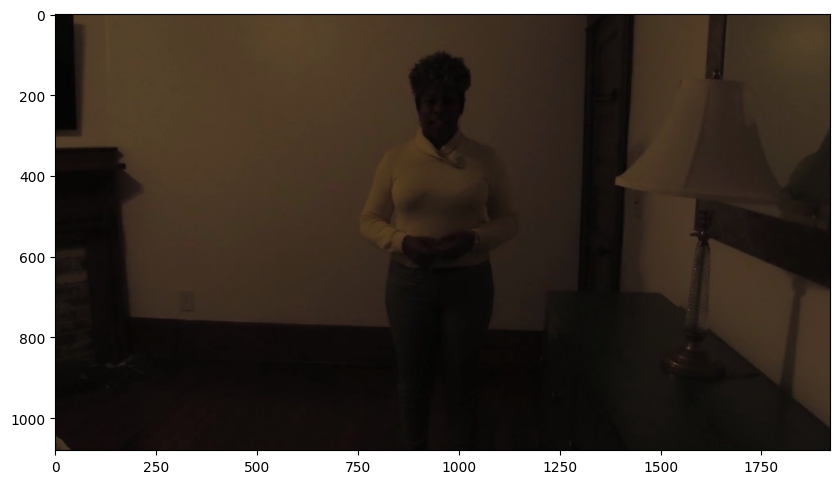

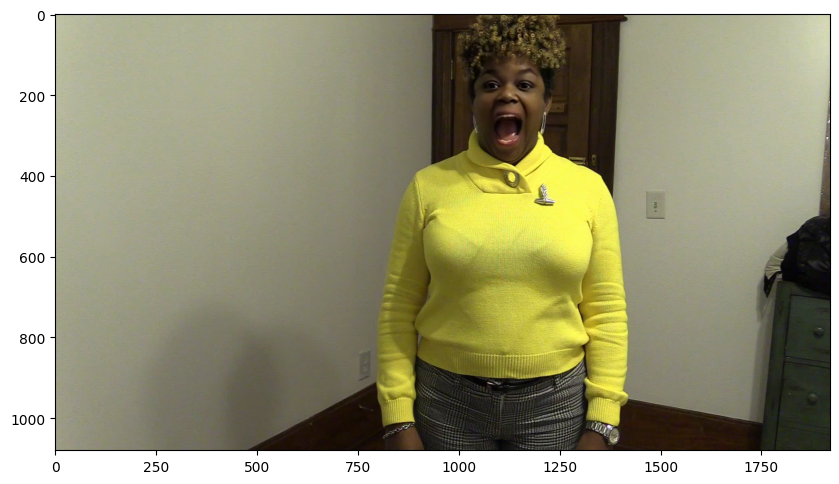

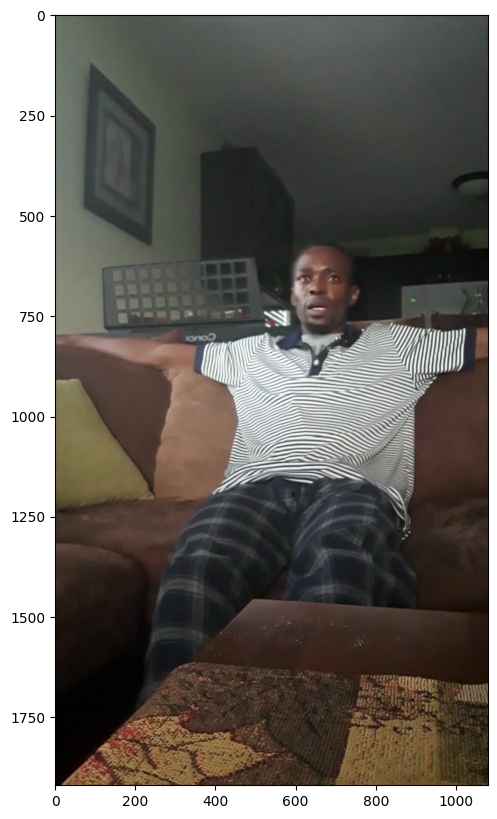

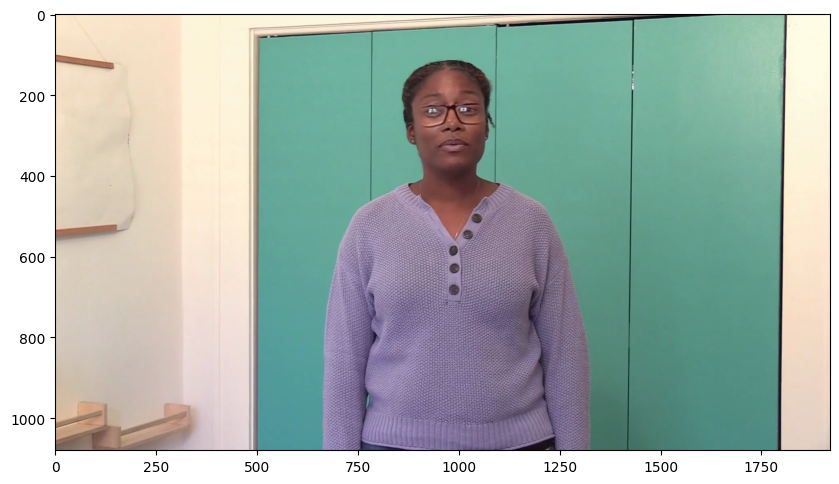

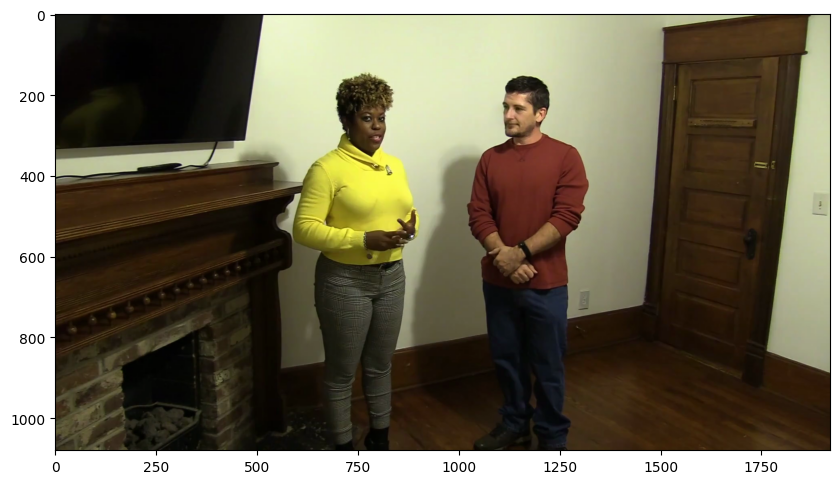

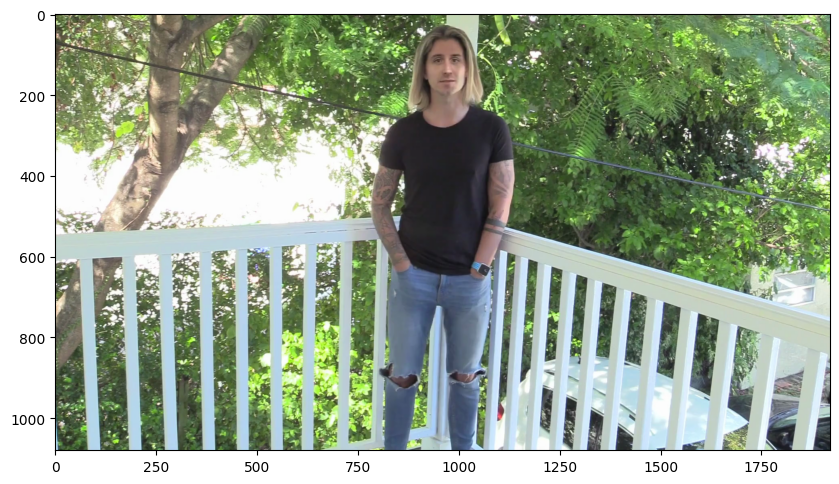

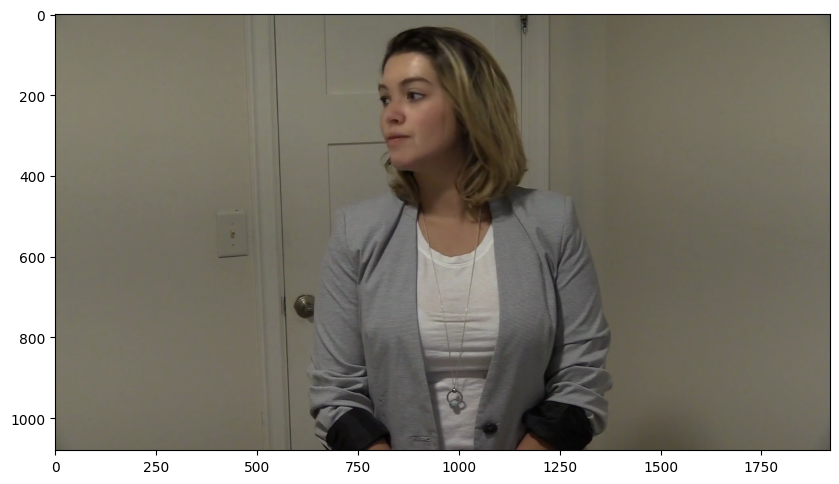

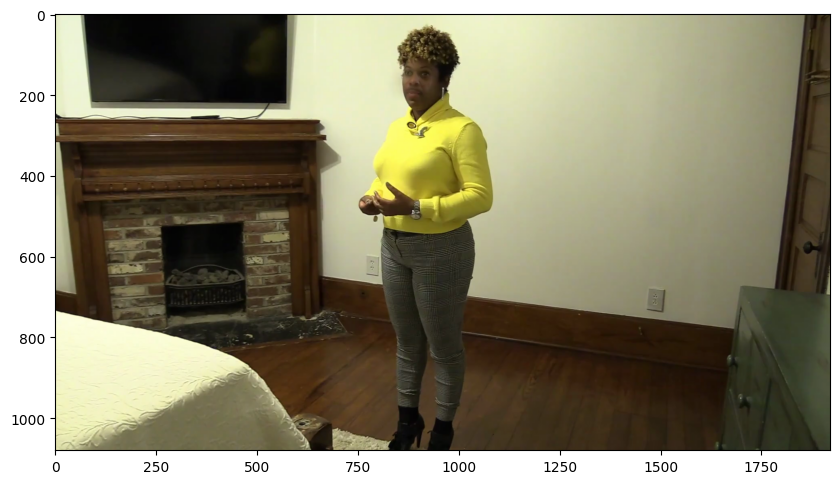

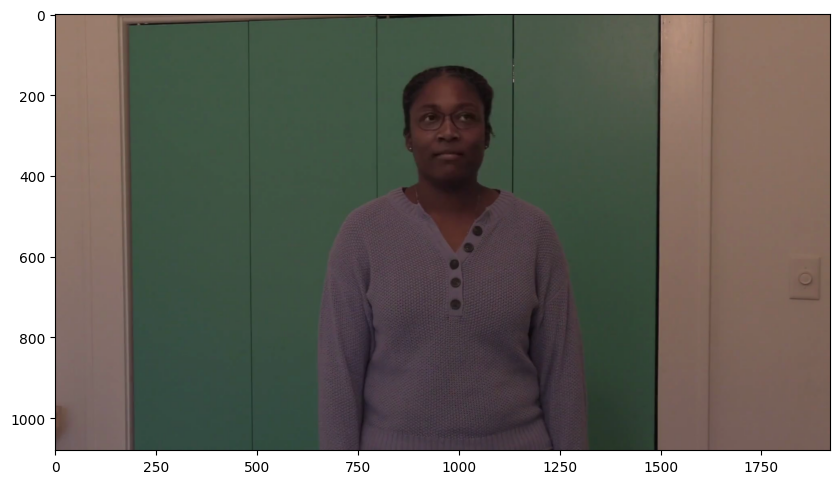

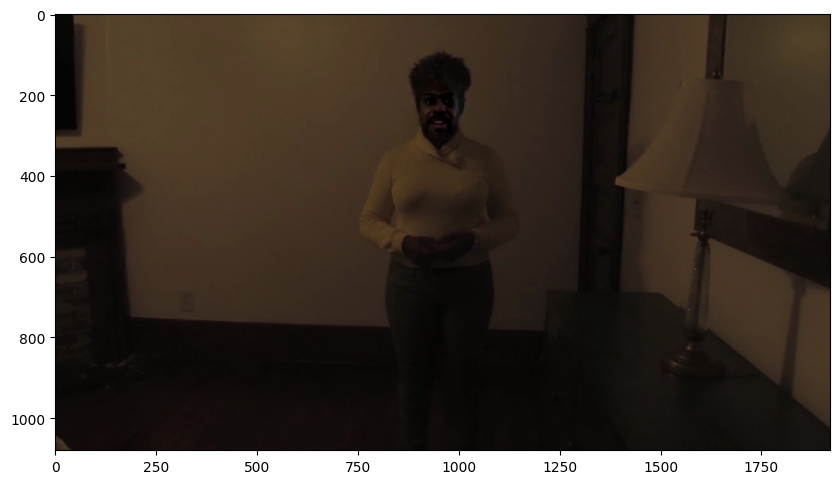

In [45]:
for video in fake_train_sample_video:
  display_image_from_video(os.path.join("Training dataset/"+video))
  print()
  print()


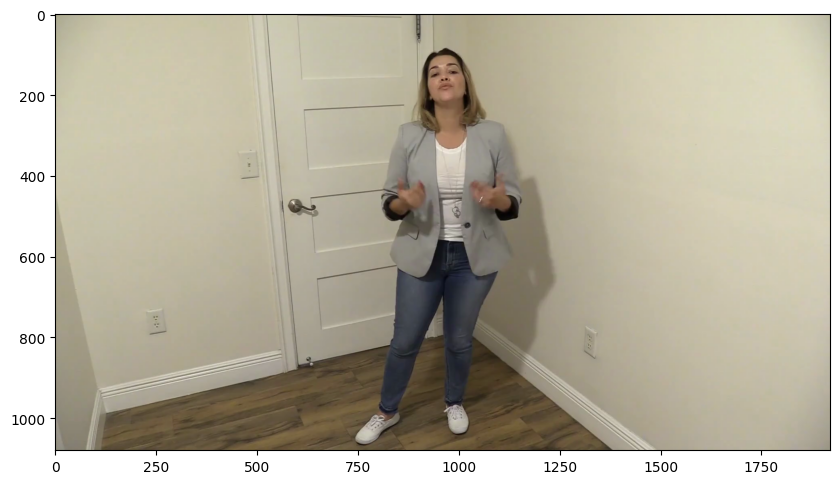

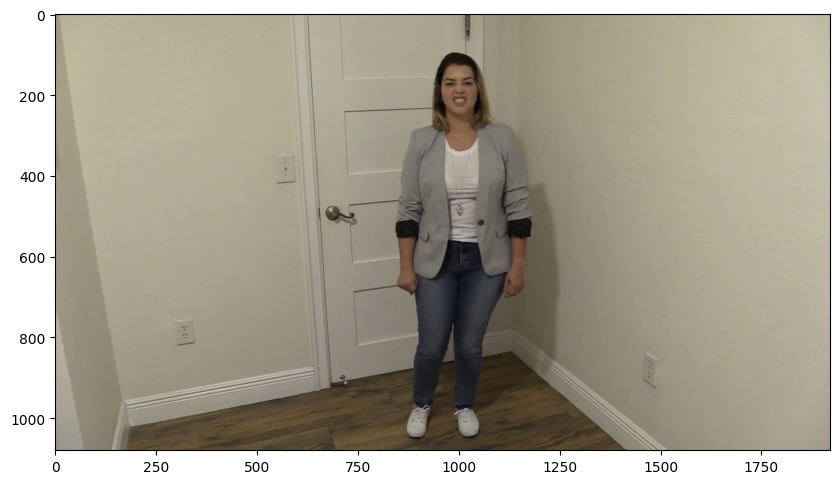

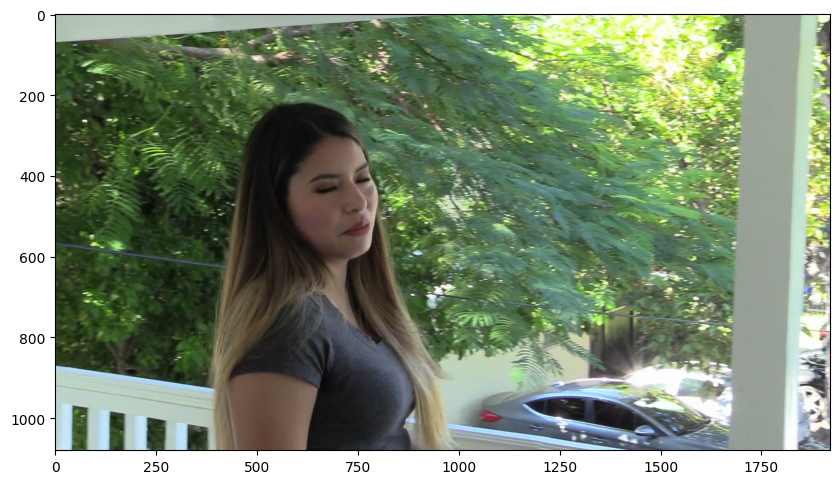

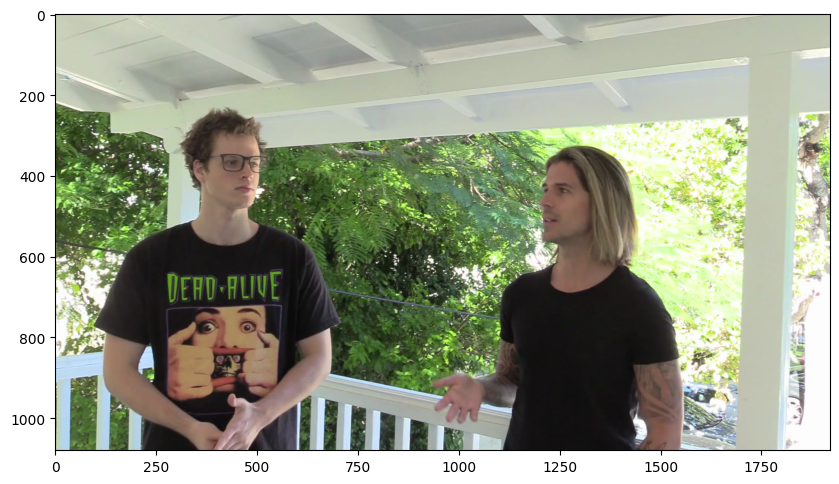

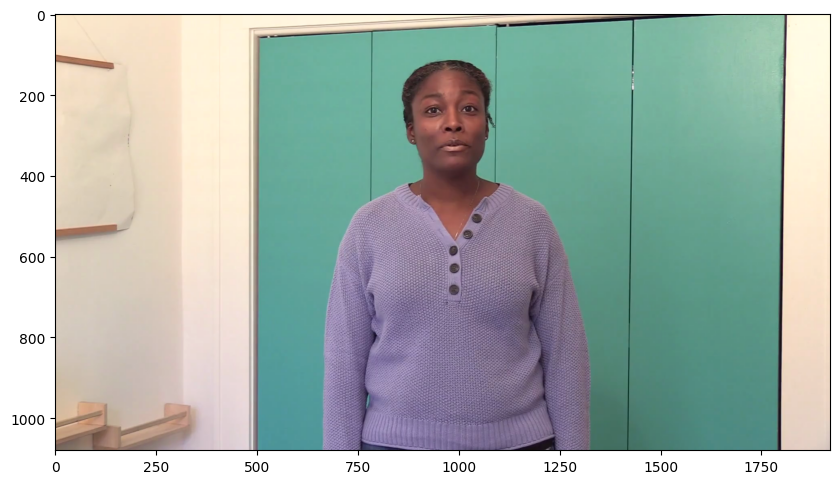

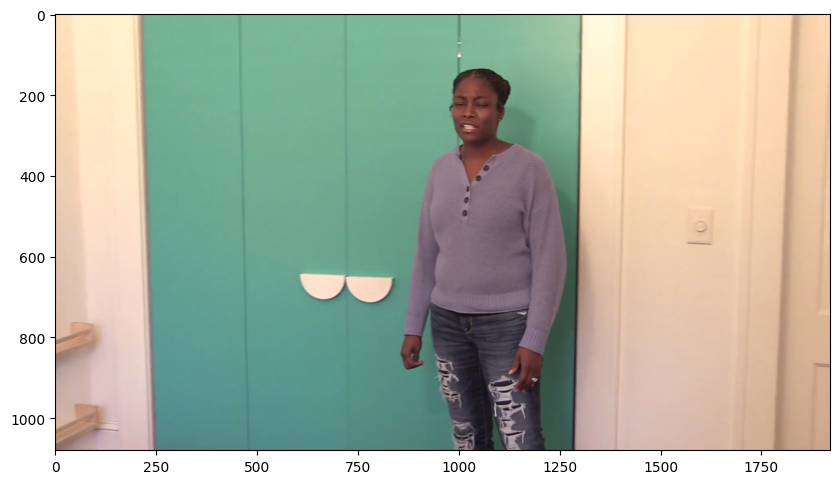

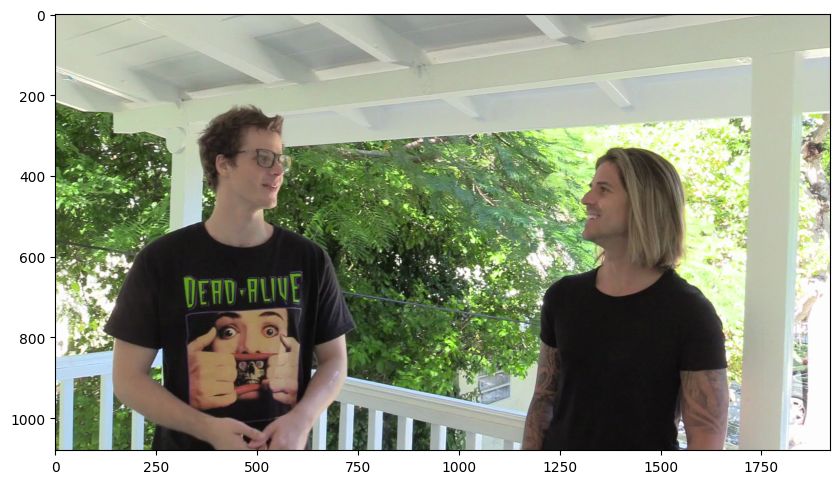

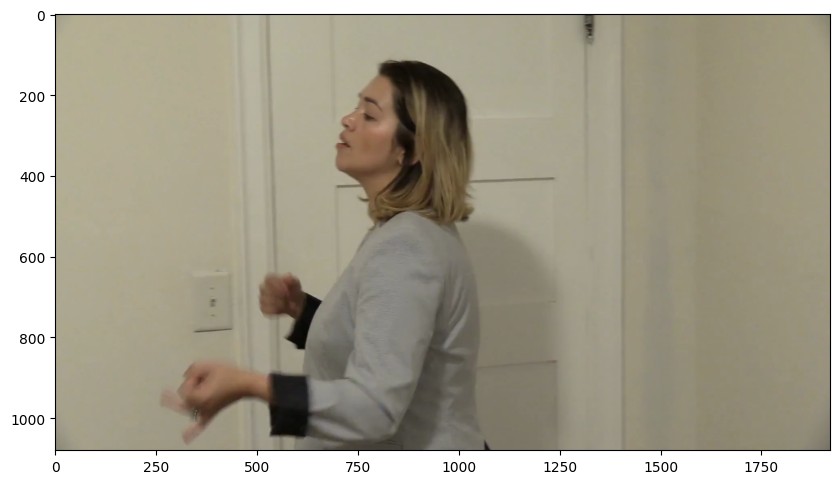

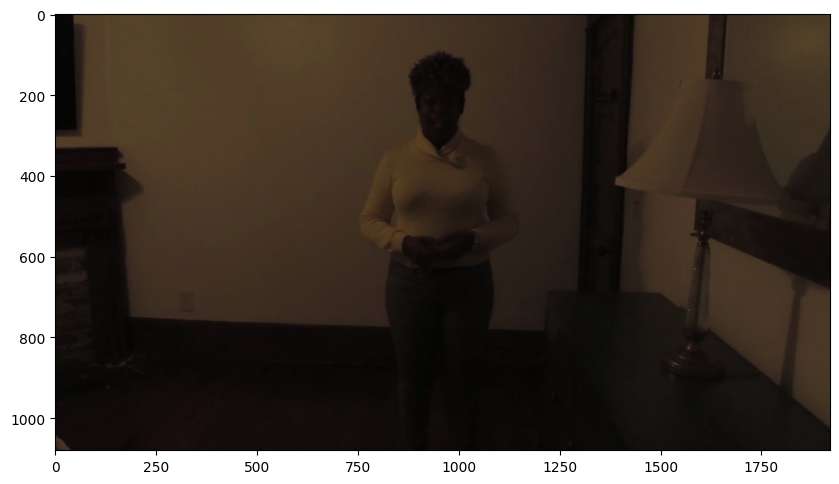

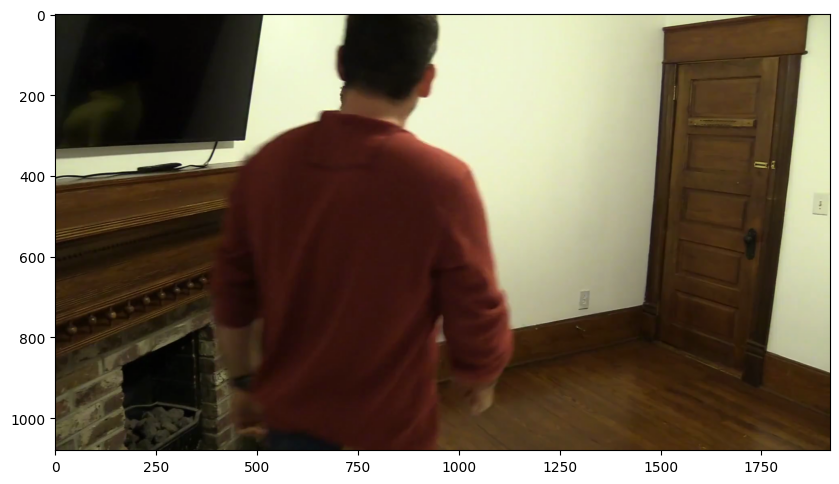

In [46]:
for video in real_train_sample_video:
  display_image_from_video(os.path.join("Training dataset/"+video))
  print()
  print()

In [47]:
videos = glob.glob('Training dataset/*.mp4')
frame_cnt = []
for video in videos:
  capture = cv.VideoCapture(video)
  frame_cnt.append(int(capture.get(cv.CAP_PROP_FRAME_COUNT)))
print("Frames: ",frame_cnt)
print("Avg Frame per video: ", np.mean(frame_cnt))  
frame_cnt = []
for video in videos:
  capture = cv.VideoCapture(video)
  frame_cnt.append(int(capture.get(cv.CAP_PROP_FRAME_COUNT)))
print("Frames: ",frame_cnt)
print("Avg Frame per video: ",np.mean(frame_cnt))

Frames:  [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 

In [48]:
def image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   # converting the frame color to RGB
    ax.imshow(frame)

    return frame

In [49]:
def image_from_video(video_path):
    '''
    input: video_path - path for video
    process:
    1. perform a video capture from the video
    2. read the image
    3. display the image
    '''
    capture_image = cv2.VideoCapture(video_path) 
    ret, frame = capture_image.read()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)   # converting the frame color to RGB
    ax.imshow(frame)

    return frame

In [50]:
#image = image_from_video("Training dataset/aagfhgtpmv.mp4")

In [51]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [52]:
def crop_center_square(frame):
    y, x = frame.shape[:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv.VideoCapture(path)
    frames = []

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = crop_center_square(frame)
            frame = cv.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    
    return np.array(frames)

In [53]:
import tensorflow as tf
from tensorflow import keras

def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )

    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

feature_extractor = build_feature_extractor()

In [54]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = list(df.index)
    labels = df["label"].values
    labels = np.array(labels == "FAKE").astype(int)

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )
        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                        batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx, ] = temp_frame_features.squeeze()
        frame_masks[idx, ] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


In [55]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(train_sample_metadata, test_size=0.2, random_state=42, stratify=train_sample_metadata['label'])

print(Train_set.shape, Test_set.shape)



(320, 3) (80, 3)


In [56]:
train_data, train_labels = prepare_all_videos(Train_set, "train")
test_data, test_labels = prepare_all_videos(Test_set, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")


Frame features in train set: (320, 20, 2048)
Frame masks in train set: (320, 20)


OpenCV: Couldn't read video stream from file "train/eckvhdusax.mp4"
OpenCV: Couldn't read video stream from file "train/apatcsqejh.mp4"
OpenCV: Couldn't read video stream from file "train/duycddgtrl.mp4"
OpenCV: Couldn't read video stream from file "train/ddqccgmtka.mp4"
OpenCV: Couldn't read video stream from file "train/cwbacdwrzo.mp4"
OpenCV: Couldn't read video stream from file "train/emaalmsonj.mp4"
OpenCV: Couldn't read video stream from file "train/curpwogllm.mp4"
OpenCV: Couldn't read video stream from file "train/ahdbuwqxit.mp4"
OpenCV: Couldn't read video stream from file "train/bseamdrpbj.mp4"
OpenCV: Couldn't read video stream from file "train/dlrsbscitn.mp4"
OpenCV: Couldn't read video stream from file "train/dzwkmcwkwl.mp4"
OpenCV: Couldn't read video stream from file "train/bwuwstvsbw.mp4"
OpenCV: Couldn't read video stream from file "train/apogckdfrz.mp4"
OpenCV: Couldn't read video stream from file "train/dwediigjit.mp4"
OpenCV: Couldn't read video stream from file "tr

In [57]:
frame_features_input = keras.Input(shape=(MAX_SEQ_LENGTH, NUM_FEATURES))

mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

x = keras.layers.GRU(64, return_sequences=True)(frame_features_input, mask=mask_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GRU(32, return_sequences=True)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GRU(16)(x)
x = keras.layers.Dropout(0.5)(x)  # Increased dropout
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)  # Added another dropout layer
output = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model([frame_features_input, mask_input], output)

# Use a lower learning rate and different optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

# Include Early Stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('model_checkpoint.weights.h5', save_weights_only=True, save_best_only=True)

history = model.fit(
    [train_data[0], train_data[1]],
    train_labels,
    validation_data=([test_data[0], test_data[1]], test_labels),
    callbacks=[checkpoint, early_stopping],
    epochs=EPOCHS,
    batch_size=16
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 20, 2048)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_3 (GRU)         │ (None, 20, 64)    │    405,888 │ input_layer_6[0]… │
│                     │                   │            │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ gru_3[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_4 (GRU)         │ (None, 20, 32)    │      9,408 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 32)    │        128 │ gru_4[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_5 (GRU)         │ (None, 16)        │      2,400 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16)        │          0 │ gru_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        544 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 418,657 (1.60 MB)

 Trainable params: 418,465 (1.60 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7169 - loss: 0.6930 - val_accuracy: 0.8125 - val_loss: 0.6925
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7738 - loss: 0.6925 - val_accuracy: 0.8125 - val_loss: 0.6920
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7829 - loss: 0.6919 - val_accuracy: 0.8125 - val_loss: 0.6914
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7641 - loss: 0.6915 - val_accuracy: 0.8125 - val_loss: 0.6908
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7957 - loss: 0.6907 - val_accuracy: 0.8125 - val_loss: 0.6901
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8068 - loss: 0.6901 - val_accuracy: 0.8125 - val_loss: 0.6896
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8174 - loss: 0.6894 - val_accuracy: 0.8125 - val_loss: 0.6890
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8130 - loss: 0.6888 - val_accuracy: 0.8125 - v

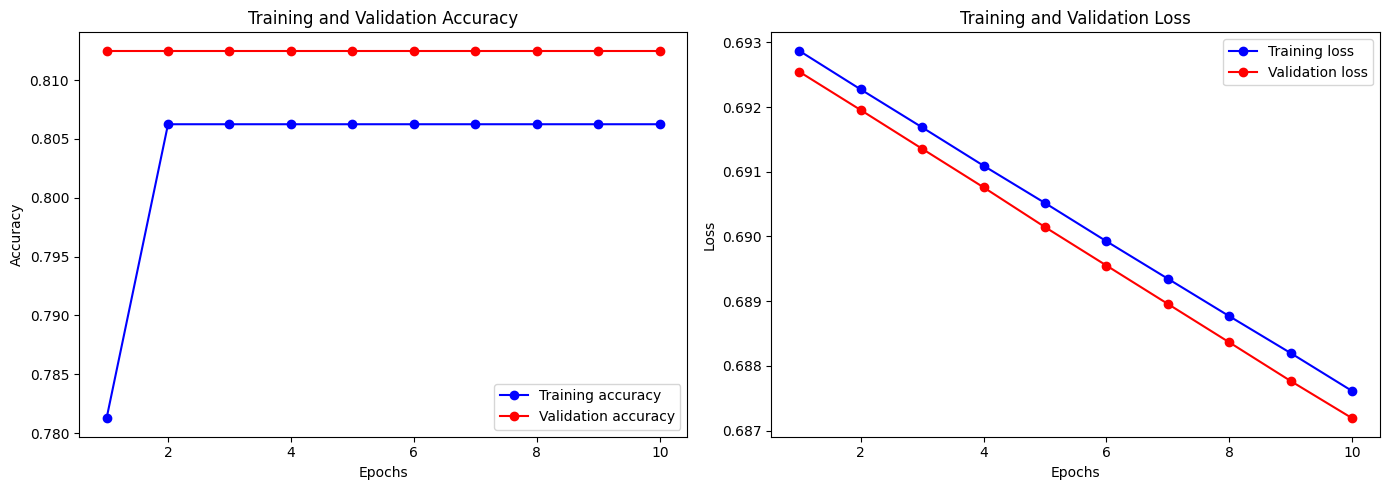

In [58]:
import matplotlib.pyplot as plt

# Extract the data from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
import os
DATA_FOLDER = os.path.expanduser("~/Desktop/ML_project")  
TEST_FOLDER = "TEST_VIDEO"  

def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    print(os.path.join(DATA_FOLDER, TEST_FOLDER, path))
    frames = load_video(os.path.join(DATA_FOLDER, TEST_FOLDER, path))
    frame_features, frame_mask = prepare_single_video(frames)
    return model.predict([frame_features, frame_mask])[0]


# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")

# Creating a test video dataset with multiple videos
data = {
    "video": [
        "aagfhgtpmv.mp4"
    ]
}

# Convert to DataFrame
test_videos = pd.DataFrame(data)

# Save to CSV
test_videos.to_csv("test_videos.csv", index=False)
print("Test video dataset created successfully!")

# Load the dataset
test_videos = pd.read_csv("test_videos.csv")

# Select a random test video
test_video = np.random.choice(test_videos["video"].values.tolist())
print(f"Test video path: {test_video}")

# Check if `sequence_prediction` function exists
try:
    prediction = sequence_prediction(test_video)  # Ensure this function is correctly defined
    if prediction >= 0.5:
        print("The predicted class of the video is FAKE")
    else:
        print("The predicted class of the video is REAL")
except NameError:
    print("Error: The function `sequence_prediction` is not defined.")
except Exception as e:
    print(f"An error occurred: {e}")


#play_video(test_video, TEST_FOLDER)


Test video dataset created successfully!
Test video path: aagfhgtpmv.mp4
/Users/aanchalarora/Desktop/ML_project/TEST_VIDEO/aagfhgtpmv.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
The predicted class of the video is REAL


In [60]:
model.save('deepfake_video_model.h5')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


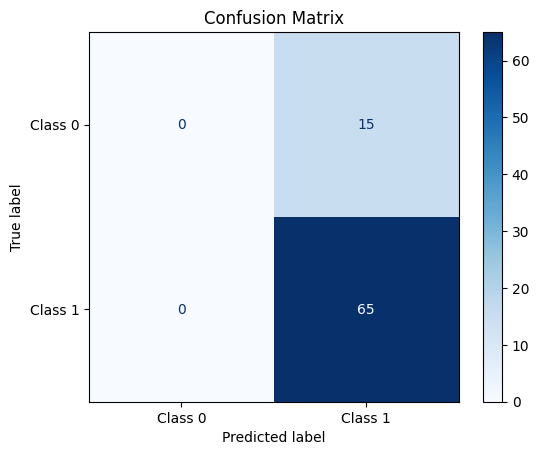

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get model predictions on the Test_set
Y_pred_probabilities = model.predict([test_data[0], test_data[1]])

# Step 2: Convert probabilities to binary predictions (threshold at 0.5)
Y_pred_labels = (Y_pred_probabilities > 0.5).astype(int)

# Step 3: Generate the confusion matrix
Conf_matrix = confusion_matrix(test_labels, Y_pred_labels)

# Step 4: Plot the confusion matrix
Conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=Conf_matrix, display_labels=["Class 0", "Class 1"])
Conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()